# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
from api_keys import api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


In [5]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Processing Record 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=rikitea
City not found. Skipping...
Processing Record 2 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=cayenne
Processing Record 3 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=bethel
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=busselton
City not found. Skipping...
Processing Record 5 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=puerto ayora
Processing Record 6 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=severo-kurilsk
Processing Record 7 | New Norfolk
http://api.openweathermap.org/data/2.5

Processing Record 57 | Mega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=mega
City not found. Skipping...
Processing Record 58 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=bluff
City not found. Skipping...
Processing Record 59 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=port lincoln
Processing Record 60 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=clyde river
Processing Record 61 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=atuona
Processing Record 62 | Lengshuijiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=lengshuijiang
Processing Record 63 | Wuchang
http://api.openweathermap.org/data/2.5/weat

City not found. Skipping...
Processing Record 112 | Fort Saint James
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=fort saint james
Processing Record 113 | Emilio Carranza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=emilio carranza
Processing Record 114 | Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=lasa
Processing Record 115 | Ojinaga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=ojinaga
Processing Record 116 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=noumea
Processing Record 117 | Murray Bridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=murray bridge
Processing Record 118 | Snezhnogorsk
http://api.openweathermap.org/data/2.5/

Processing Record 168 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=tessalit
Processing Record 169 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=haines junction
Processing Record 170 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=muros
Processing Record 171 | Balta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=balta
Processing Record 172 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=saint-philippe
Processing Record 173 | Ola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=ola
Processing Record 174 | Ikalamavony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4

Processing Record 223 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=itoman
Processing Record 224 | Vesoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=vesoul
Processing Record 225 | Cariamanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=cariamanga
City not found. Skipping...
Processing Record 226 | San Rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=san rafael
Processing Record 227 | Mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=mercedes
Processing Record 228 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=banda aceh
Processing Record 229 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 279 | Madang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=madang
Processing Record 280 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=narsaq
Processing Record 281 | Porec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=porec
Processing Record 282 | Tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=tezu
Processing Record 283 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=saint-pierre
Processing Record 284 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=arraial do cabo
Processing Record 285 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a89

Processing Record 333 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=nanortalik
Processing Record 334 | Lewiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=lewiston
Processing Record 335 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=rawson
Processing Record 336 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=mecca
Processing Record 337 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=northam
Processing Record 338 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=lavrentiya
Processing Record 339 | Den Helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927f

Processing Record 389 | Urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=urengoy
Processing Record 390 | Voskresenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=voskresenskoye
Processing Record 391 | Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=sale
Processing Record 392 | Cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=cairns
Processing Record 393 | Sines
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=sines
Processing Record 394 | Agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=agadez
Processing Record 395 | Fukumitsu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=fukum

Processing Record 446 | Khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=khani
Processing Record 447 | Bucerias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=bucerias
Processing Record 448 | Minsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=minsk
Processing Record 449 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=longyearbyen
Processing Record 450 | Dezhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=dezhou
Processing Record 451 | Oga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=oga
Processing Record 452 | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=kattivakk

Processing Record 502 | Brezice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=brezice
Processing Record 503 | Mayya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=mayya
City not found. Skipping...
Processing Record 504 | Gravelbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=gravelbourg
Processing Record 505 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=olinda
Processing Record 506 | Muisne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=muisne
Processing Record 507 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68457786e4d173a9e678c4e59a8927fa&q=nome
City not found. Skipping...
Processing Record 508 | Pizarro
http://api.openweathermap.org/data/2.5/weather?units=Imperia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()

City          525
Cloudiness    525
Country       525
Date          525
Humidity      525
Lat           525
Lng           525
Max Temp      525
Wind Speed    525
dtype: int64

In [7]:
weather_data.to_csv('weather.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,41,PF,1561397921,86,-23.12,-134.97,71.2,14.03
1,Cayenne,75,GF,1561397923,66,4.94,-52.33,87.8,10.29
2,Bethel,75,US,1561397924,82,60.79,-161.76,59.0,3.36
3,Busselton,100,AU,1561397925,68,-33.64,115.35,57.0,16.04
4,Puerto Ayora,20,EC,1561397868,73,-0.74,-90.35,77.0,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

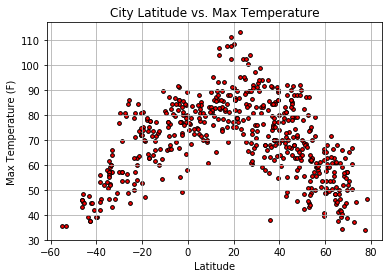

In [8]:
plt.scatter(weather_data ["Lat"], weather_data ["Max Temp"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

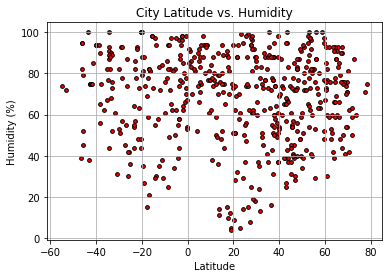

In [9]:
plt.scatter(weather_data ["Lat"], weather_data ["Humidity"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)
plt.savefig("Humidity_vs_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

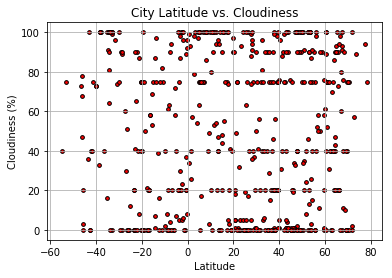

In [10]:
plt.scatter(weather_data ["Lat"], weather_data ["Cloudiness"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)
plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

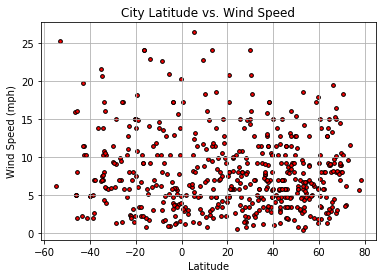

In [11]:
plt.scatter(weather_data ["Lat"], weather_data ["Wind Speed"], marker="o", facecolors="red", edgecolors="black", s=14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)
plt.savefig("Wind_Speed_vs_Latitude.png")
plt.show()